In [ ]:
import pandas as pd
import skimage.io
import skimage.feature
import skimage.transform
import sklearn.decomposition
import os
import matplotlib.pyplot as plt
import numpy as np

data_dir = "data"

df = pd.read_parquet(os.path.join(data_dir, "dataset.parquet"))
features = np.array(df["features"].to_list())

In [51]:
features.shape

(5320, 7200)

In [56]:
pca = sklearn.decomposition.PCA(n_components=512)
reduced_features = pca.fit_transform(features)

reduced_features.shape

(5320, 512)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    reduced_features, df["label"].to_numpy(), test_size=0.2, random_state=42
)
model = SVC()
model.fit(X_train, y_train)

SVC()

In [54]:
y_test.shape

(1064,)

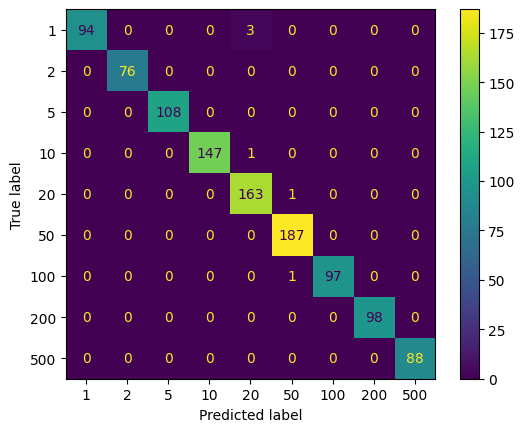

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# wyciek danych - rotacje tych samych obrazów pewnie tam są